## Our Problem:
----

a) Verzin een zenderinrichting voor de Oekraïne. Iedere provincie moet een zendertype hebben, geen enkele twee aangrenzende provincies mogen hetzelfde zendertype hebben.
Verzin een zenderinrichting voor het hele land, en hoe minder zendertypes je gebruikt, hoe beter.

Als we dit probleem anders vertalen namelijk de zendertypes veranderen voor kleuren krijgen we het volgende: 
    
Verzin een <span style="color:red">*kleurenpallet.*</span> voor Oekraïne. Iedere provincie moet een <span style="color:red">*kleur* </span> hebben, geen enkele twee aangrenzende provincies mogen dezelfde <span style="color:red">*kleur* </span> hebben. 

#### Mogelijke oplossing. 
----

* Dit heeft er schijn van dat het lijkt op het “four color theorem”
* Verder kan er gekeken worden naar ‘Graph Coloring’ 
* Op de Wikipedia pagina die gaat over het kleuren van grafen (https://nl.wikipedia.org/wiki/Kleuren_van_grafen) wordt verondersteld dat een greedy algoritme van toepassing is voor de knopen kleuring van een graaf.


----

#### Importing Networkx for network calculations

In order to get a list of countries and their provinces, the module pycountry is being used. 
To use this module use: pip install pycountry

-----

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1,figsize=(15,15))

[u"Cherkas'ka Oblast'", u"Chernihivs'ka Oblast'", u"Chernivets'ka Oblast'", u"Dnipropetrovs'ka Oblast'", u"Donets'ka Oblast'", u"Ivano-Frankivs'ka Oblast'", u"Kharkivs'ka Oblast'", u"Khersons'ka Oblast'", u"Khmel'nyts'ka Oblast'", u"Kirovohrads'ka Oblast'", u"Ky\xefvs'ka Oblast'", u"Ky\xefvs'ka mis'ka rada", u"L'vivs'ka Oblast'", u"Luhans'ka Oblast'", u"Mykola\xefvs'ka Oblast'", u"Odes'ka Oblast'", u"Poltavs'ka Oblast'", u'Respublika Krym', u"Rivnens'ka Oblast'", u'Sevastopol', u"Sums 'ka Oblast'", u"Ternopil's'ka Oblast'", u"Vinnyts'ka Oblast'", u"Volyns'ka Oblast'", u"Zakarpats'ka Oblast'", u"Zaporiz'ka Oblast'", u"Zhytomyrs'ka Oblast'"]


C:\Users\Wout\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Wout\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Wout\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Wout\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

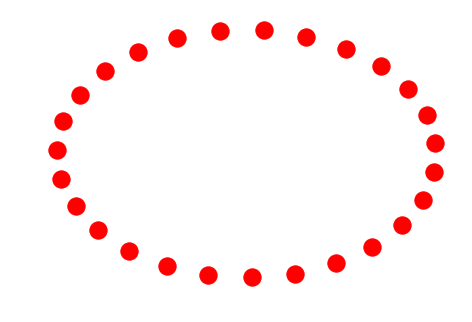

In [2]:
import pycountry

list(pycountry.countries)[0]
ukraine = pycountry.countries.get(name='Ukraine')

UA_oblast = list(pycountry.subdivisions.get(country_code="UA"))

oblast = [x.name for x in UA_oblast]
print sorted(oblast)

UA = nx.Graph()
UA.add_nodes_from(oblast)
nx.draw(UA)


(u'Zhytomyr Oblast', u'Vinnytsia Oblast')
(u'Zhytomyr Oblast', u'Kyiv Oblast')
(u'Zhytomyr Oblast', u'Khmelnytsky Oblast')
(u'Zhytomyr Oblast', u'Rivne Oblast')
(u'Zhytomyr Oblast', u'Gomel Region')
(u'Cherkasy Oblast', u'Poltava Oblast')
(u'Cherkasy Oblast', u'Kyiv Oblast')
(u'Cherkasy Oblast', u'Kirovohrad Oblast')
(u'Kherson Oblast', u'Dnipropetrovsk Oblast')
(u'Kherson Oblast', u'Zaporizhzhya Oblast')
(u'Kherson Oblast', u'Mykolaiv Oblast')
(u'Kherson Oblast', u'Autonomous Republic of Crimea')
(u'Lviv Oblast', u'Volyn Oblast')
(u'Lviv Oblast', u'Zakarpattia Oblast')
(u'Lviv Oblast', u'Ternopil Oblast')
(u'Lviv Oblast', u'Rivne Oblast')
(u'Lviv Oblast', u'Ivano-Frankivsk Oblast')
(u'Vinnytsia Oblast', u'Zhytomyr Oblast')
(u'Vinnytsia Oblast', u'Chernivtsi Oblast')
(u'Vinnytsia Oblast', u'Kyiv Oblast')
(u'Vinnytsia Oblast', u'Khmelnytsky Oblast')
(u'Vinnytsia Oblast', u'Odessa Oblast')
(u'Vinnytsia Oblast', u'Kirovohrad Oblast')
(u'Vinnytsia Oblast', u'Ocni\u021ba District')
(u'Vinny

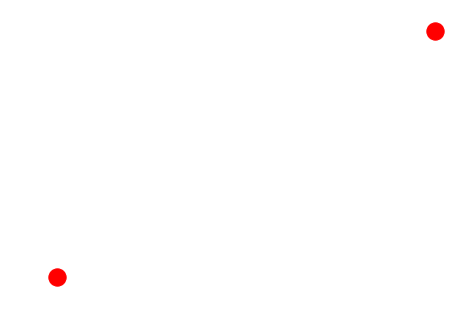

In [41]:
#pip install sparqlwrapper
#https://rdflib.github.io/sparqlwrapper/

from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

sparql.setQuery("""SELECT ?oblastLabel ?borderLabel WHERE {
  ?oblast wdt:P31 wd:Q3348196.
  ?border wdt:P47 ?oblast.
 
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    # Bordering Oblasts
    nb_oblasts = result['oblastLabel']['value'], result['borderLabel']['value']
    print nb_oblasts

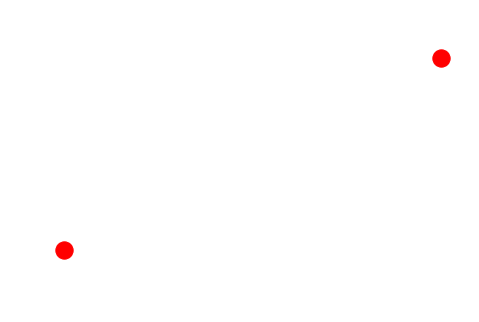

In [42]:
UA = nx.Graph()
UA.add_nodes_from(nb_oblasts)
nx.draw(UA)
